# 資料一 | [income classification](https://www.kaggle.com/lodetomasi1995/income-classification)

**變數解釋**  
年齡//工作類型//序號//教育程度//受教育時間//婚姻狀況//職業//關係//種族//性別//資本收益//資本損失//每周工作時數//國籍  
  
**預測變數**  
收入(pos: >50K , neg: <=50K)  

In [2]:
# 載入基本 package
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import sklearn

<font color=#00008b size=5 face="黑體"><h2>**資料讀取. 探索**</h2></font>

In [5]:
income_df = pd.read_csv('.\\data\\1.income_evaluation.csv')
# revise the column name
for col_name in income_df.columns:
    if col_name[0] == ' ':
        income_df.rename(columns = {col_name:col_name[1:]}, inplace = True)
# remove the meaningless column
# del income_df['fnlwgt']

income_df = income_df.replace(' ?', ' Unknown')

income_df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# split data by the label
income_pos = income_df[income_df["income"] == " >50K"]
income_neg = income_df[income_df["income"] == " <=50K"]
income_df["income_n"] = income_df["income"].map({" >50K":1, " <=50K":0})

<AxesSubplot:xlabel='income', ylabel='count'>

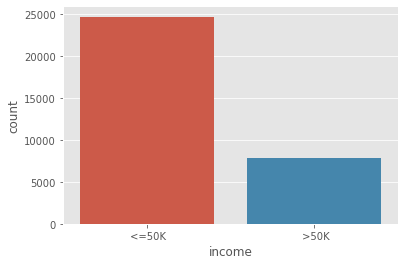

In [6]:
sns.countplot(x='income', data=income_df)

In [8]:
data_y = income_df.income
print(data_y.value_counts())
print('\npos% :', data_y.value_counts()[1]/len(data_y))

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

pos% : 0.2408095574460244


In [9]:
# 資料基本描述
def data_explore(df):
    print("*Missing values :  ", df.isnull().sum().values.sum())
    print("*duplicate values :  ", df.duplicated().sum(), sep='')
    print("*Unique values & feature type : ")
    display(pd.DataFrame({'unique values':df.nunique(), 'feature type':df.dtypes}))

# 區分連續與量化資料
def split_data_by_feature_types(df):
    df_categorial, df_quantitative = [], []
    for col_name, types in zip(df.columns, df.dtypes):
        if types in ['object','bool']:
            df_categorial.append(col_name)
        else:
            df_quantitative.append(col_name)
    df_categorial = df[df_categorial]
    df_quantitative = df[df_quantitative]
    
    return df_categorial, df_quantitative

data_explore(income_df)
income_categorial, income_quantitative = split_data_by_feature_types(income_df)

*Missing values :   0
*duplicate values :  3465
*Unique values & feature type : 


,unique values,feature type
age,73,int64
workclass,9,object
education,16,object
education-num,16,int64
marital-status,7,object
occupation,15,object
relationship,6,object
race,5,object
sex,2,object
capital-gain,119,int64


In [61]:
d = income_df.copy()[['education','education-num']]
d = d.sort_values(by='education-num').drop_duplicates().reset_index(drop=True)
education_sort = list(d.education)
d

,education,education-num
0,Preschool,1
1,1st-4th,2
2,5th-6th,3
3,7th-8th,4
4,9th,5
5,10th,6
6,11th,7
7,12th,8
8,HS-grad,9
9,Some-college,10


In [89]:
d = income_df[['native-country']].value_counts()
d

native-country             
 United-States                 29170
 Mexico                          643
 Unknown                         583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru     

<font color=#00008b size=5 face="黑體"><h2>**類別變數繪圖**</h2></font>

In [10]:
income_categorial.columns.drop("income")

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

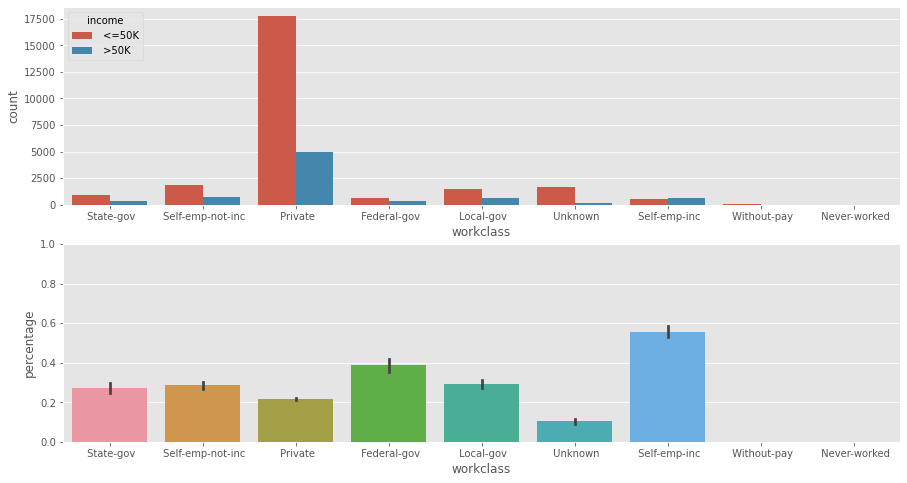

In [34]:
# 類別變數繪圖 (countplot, barplot) -- workclass
feature = "workclass"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0])
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

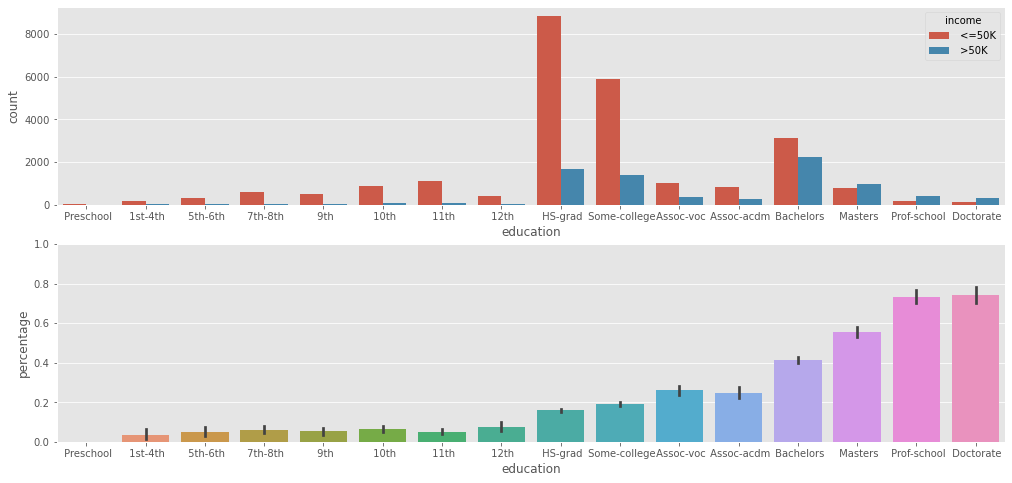

In [72]:
# 類別變數繪圖 (countplot, barplot) -- education
feature = "education"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (17,8))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0], order = education_sort)
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1], order = education_sort)
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

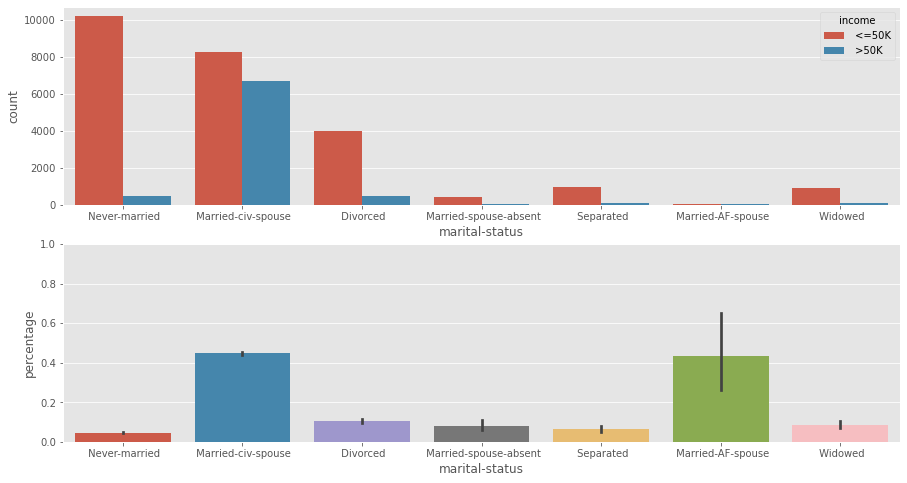

In [36]:
# 類別變數繪圖 (countplot, barplot) -- marital-status
feature = "marital-status"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0])
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

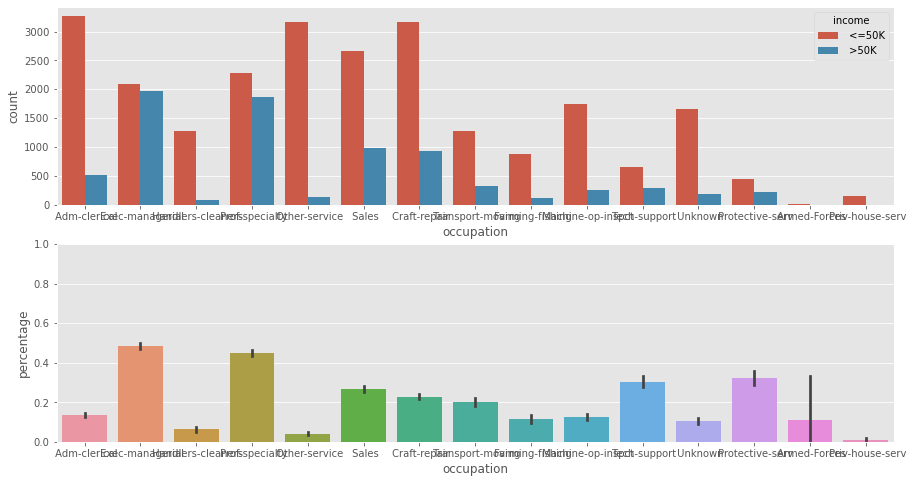

In [73]:
# 類別變數繪圖 (countplot, barplot) -- occupation
feature = "occupation"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0])
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

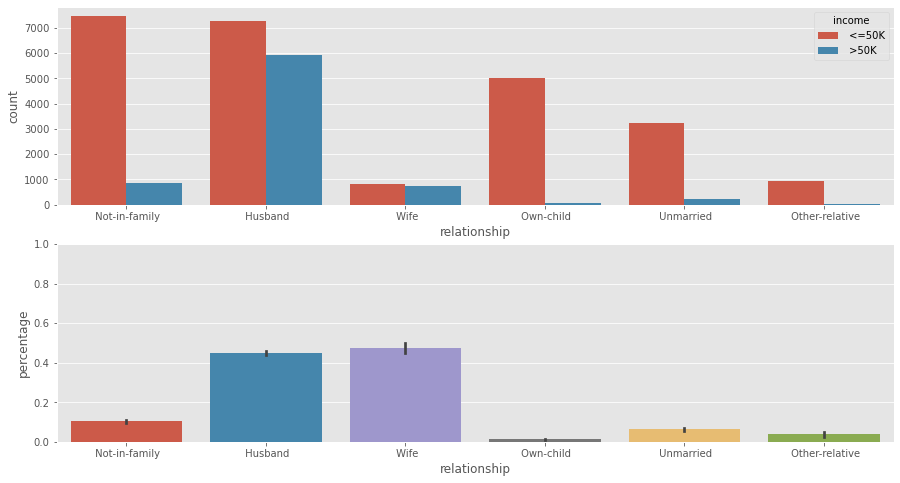

In [74]:
# 類別變數繪圖 (countplot, barplot) -- relationship
feature = "relationship"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0])
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

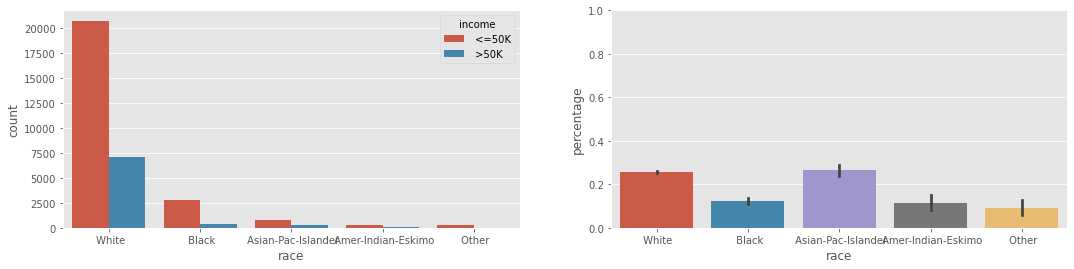

In [76]:
# 類別變數繪圖 (countplot, barplot) -- race
feature = "race"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,4))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0])
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

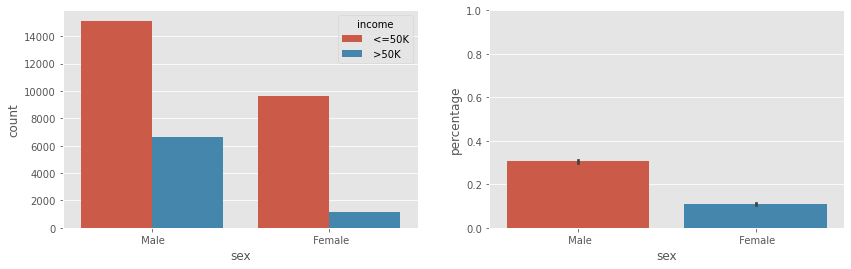

In [79]:
# 類別變數繪圖 (countplot, barplot) -- sex
feature = "sex"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0])
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

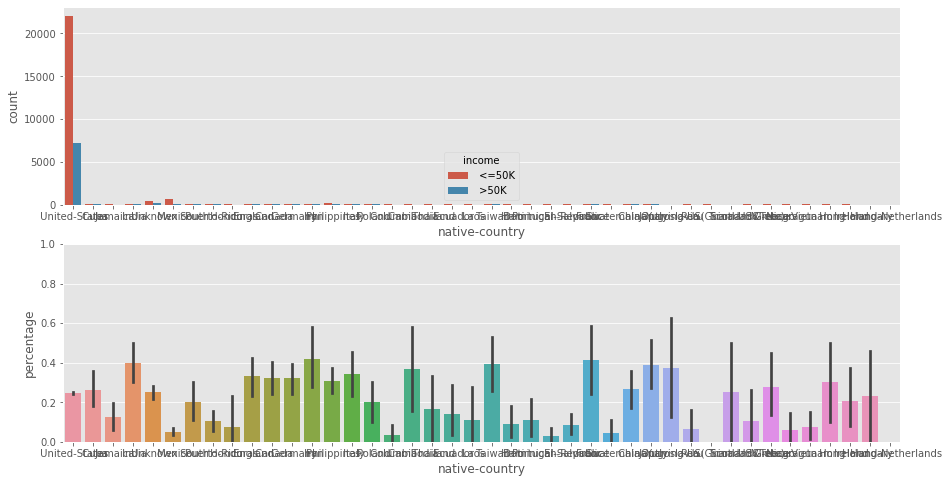

In [80]:
# 類別變數繪圖 (countplot, barplot) -- native-country
feature = "native-country"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0])
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

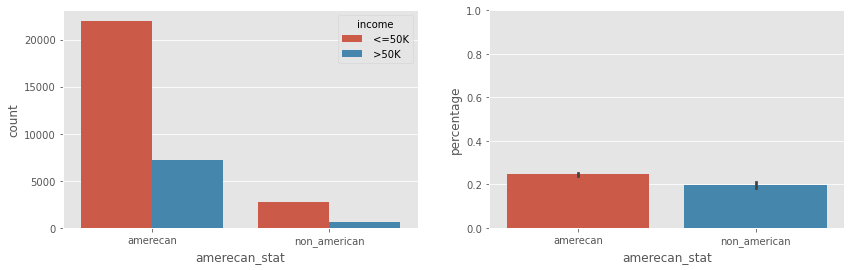

In [114]:
amerecan_stat = ['amerecan' if country==' United-States' else 'non_american' for country in income_df['native-country'] ]
income_df["amerecan_stat"] = amerecan_stat
# 類別變數繪圖 (countplot, barplot) -- amerecan_stat
feature = "amerecan_stat"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
ax1 = sns.countplot(x=feature, data=income_df, hue="income", ax=axes[0])
ax2 = sns.barplot(x=feature, y='income_n', data=income_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

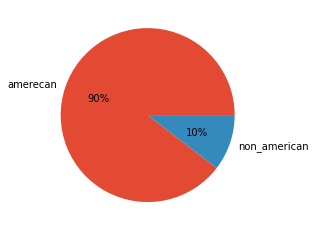

In [113]:
country = pd.DataFrame(income_df[["amerecan_stat"]].value_counts()).reset_index()
country.columns = ['native-country', 'num']
plt.pie(x='num', labels='native-country', data=country, autopct='%.0f%%')
plt.show()

<font color=#00008b size=5 face="黑體"><h2>**量化變數繪圖**</h2></font>

In [11]:
income_quantitative.columns.drop("income_n")

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

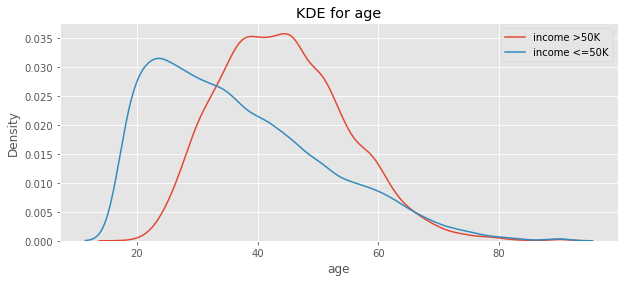

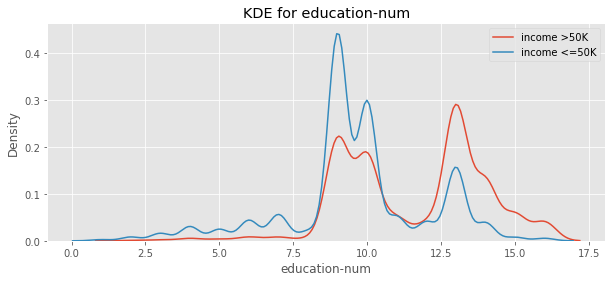

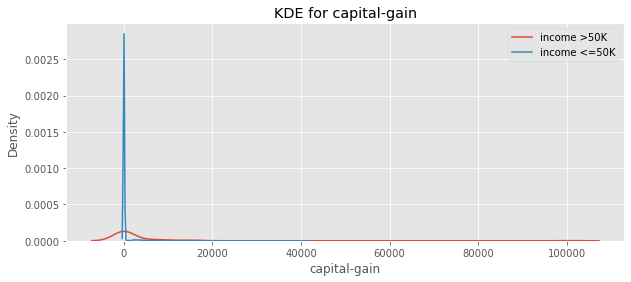

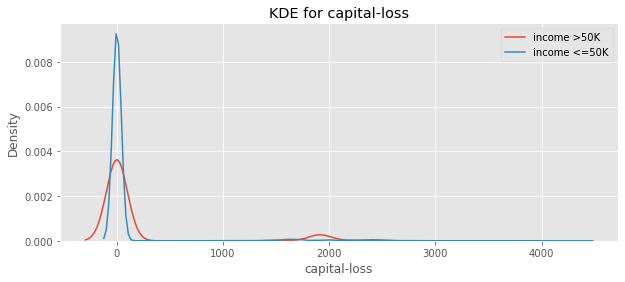

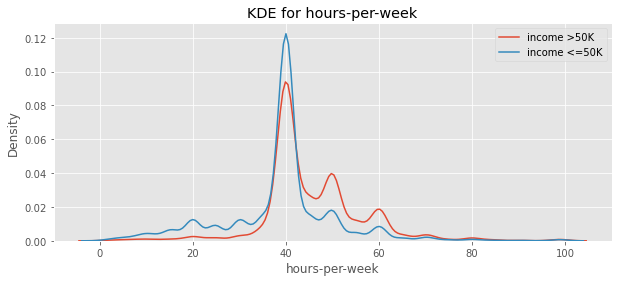

In [57]:
# 量化變數繪圖 (KDE plot)
for feature in income_quantitative.columns.drop("income_n"):
    plt.figure(figsize=(10,4))
    plt.title("KDE for {}".format(feature))
    sns.kdeplot(income_pos[feature], label='income >50K')
    sns.kdeplot(income_neg[feature], label='income <=50K')
    plt.legend()
    plt.show()

<AxesSubplot:>

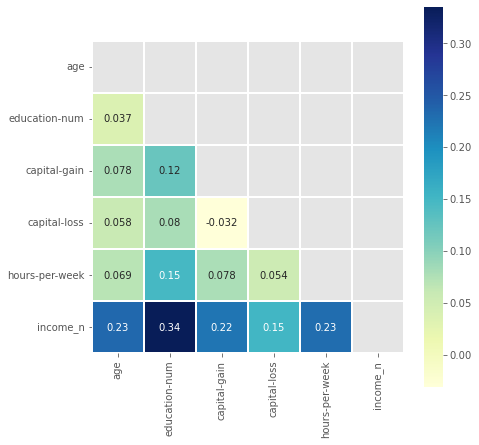

In [58]:
plt.figure(figsize=(7, 7))
corr = income_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, xticklabels=corr.columns,mask=mask, yticklabels=corr.columns, square=True,
                  linewidths=.2, cmap="YlGnBu",annot=True)

<font color=#00008b size=5 face="黑體"><h2>**資料前處理**</h2></font>

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [59]:
income_X = income_df.drop(columns=['income', 'income_n'])
income_y_f = ["income"] #目標變數
cat_cols   = income_categorial.columns.drop("income")  #類別變數
num_cols   = income_quantitative.columns.drop("income_n")  #數值變數
bin_cols   = income_X.nunique()[income_X.nunique() == 2].keys().tolist()  #二元變數
multi_cols = [i for i in cat_cols if i not in bin_cols]  #多元變數

#對二元變數編碼
encoder = LabelEncoder()
for i in bin_cols :
    income_X[i] = encoder.fit_transform(income_X[i])
    
#對多元變數編碼
income_X = pd.get_dummies(data = income_X, columns = multi_cols)

#標準化數值變數
std = StandardScaler()
income_X[num_cols] = std.fit_transform(income_X[num_cols])

<AxesSubplot:>

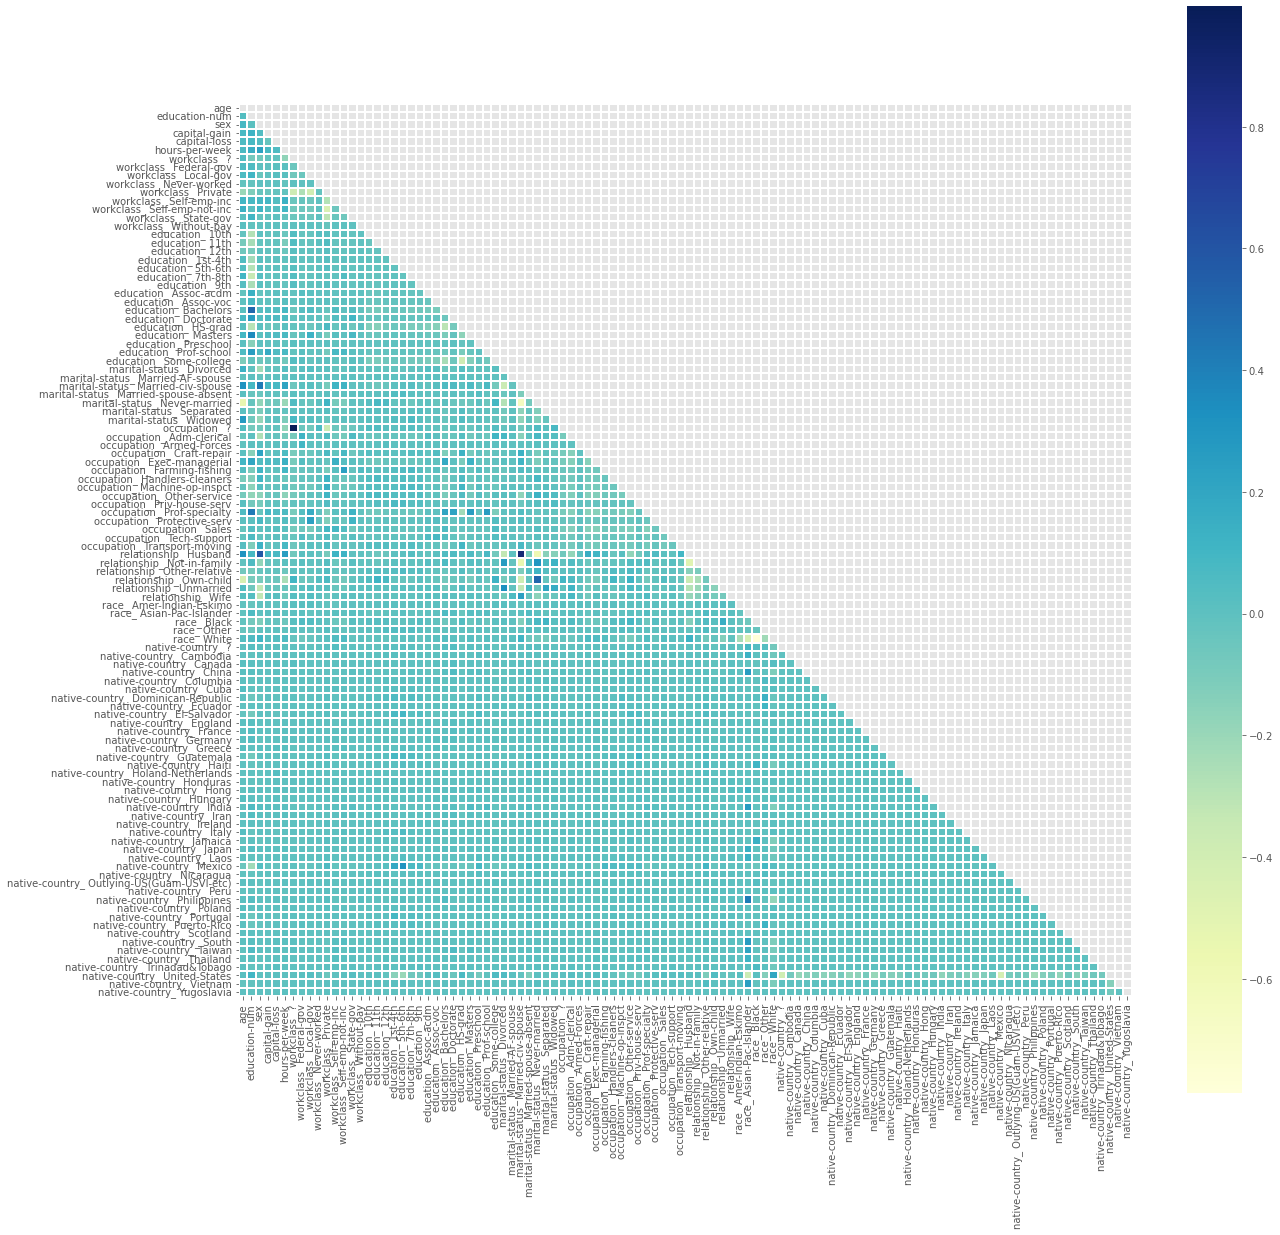

In [32]:
plt.figure(figsize=(20, 20))
corr = income_X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, xticklabels=corr.columns,mask=mask, yticklabels=corr.columns, square=True,
                  linewidths=.2, cmap="YlGnBu")

In [70]:
len(income_X.columns)

106